### 필요한 패키지 가져오기

In [3]:
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

## 랜덤의 시드값 고정 -> 항상 동일한 랜덤 수치 발생
- 실험에서 재생산성을 위한 중요 설정

In [2]:
tf.random.set_seed(777)

## 데이터 준비하기 -> 0 = False, 1 = True
- data n번째 항목의 두 원소를 OR 연산으로 수행시 label의 n번째 항목으로 결과값이 나오도록 샘플데이터를 준비

In [8]:
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [1]])

## 모델 구성하기 -> 단층 퍼셉트론 구성
- n개의 신호를 입력 받아 하나의 신호를 출력하는 형태 -> 퍼셉트론
- x와 가중치 w를 곱한 값을 모두 더하여(시그마 = 활성화 함수) 하나의 y값을 생성

In [9]:
# 순차모델 객체 생성
model = Sequential()

- Dense층 구성 ==> 입력과 출력을 연결하는 층
- Dense(1 ~ 어쩌구 에서 "1"의 의미 : 하나의 출력값을 갖는다.
- input_shape = (2, ) : 두 개의 특성을 갖는 "1"차원 데이터를 입력 받음.
- activation : 활성화 함수 지정 (추후 자세히 설명) -> 여기서는 선형의 함수를 이용한다. data와 label, 데이터와 정답을 주고 정답을 출력하기까지의 중간 단계를 입력해주는 것.

In [10]:
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))

## 모델 준비하기
- optimizer --> 수리 계획 (https://keras.io/api/optimizers/)
    -  SGD(경사하강법), RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
- loss --> 손실함수 (https://keras.io/api/losses/)
    - 신경망이 학습할 수 있도록 해주는 지표
    - 머신러닝 모델의 출력과 사용자가 원하는 출력값의 차이, 즉 오차를 의미.
    - 이 손실 함수 값이 최소화되도록하는 가중치와 편향을 찾는 것이 바로 학습니다.
    - 일반적인 손실 함수로 평균 제곱 오차(mse)나 교차 엔트로피 오차를 사용한다.
- metrics --> list 형태로 평가지표를 전달합니다.
    - loss : 훈련 손실값, acc : 훈련 정확도, val_loss : 검증 손실값, val_acc : 검증 정확도
     - acc --> 1에 가까울수록 정확한 모델임을 의미

In [12]:
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
# SGD의 경우 metrics에 들어갈 수 있는 항목이 acc밖에 없다.

## 학습시키기
- 모델에 추가한 규칙에 따라 입력값(data)와 출력값(label)을 지정해주고 학습횟수(epochs)를 지정 -> 학습 결과를 hist에 저장함

In [13]:
hist = model.fit(data, label, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 0.4808 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 997us/step - loss: 0.4599 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4403 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4218 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 996us/step - loss: 0.4045 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3882 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3728 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3584 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 998us/step - loss: 0.3320 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 0s/step - loss: 0.3

## 모델의 가중치 확인
- 가중치 : 출력결과 중 첫 번째 배열. 여기에서는 array([[0.4478314],[0.5199499]]
- 편향 : 출력결과 중 두 번째 배열. 여기에서는 array([0.26910788]

In [14]:
model.get_weights()

[array([[0.4478314],
        [0.5199499]], dtype=float32),
 array([0.26910788], dtype=float32)]

## 학습 결과 출력
- model.fit 시켜서 hist에 모아 놓은 결과 중 loss와 acc를 출력한다.

In [16]:
# 매 에포크 마다의 훈련 손실값
print(hist.history['loss'])

# 매 에포크 마다의 훈련 정확도
print(hist.history['acc'])

# 매 에포크 마다의 검증 손실값      -> SGD에는 acc밖에 사용하지 못함
# print(hist.history['val_loss'])

# 매 에포크 마다의 검증 정확도      -> SGD에는 acc밖에 사용하지 못함
# print(hist.history['val_acc'])


[0.48084670305252075, 0.4599470794200897, 0.4403055012226105, 0.4218434691429138, 0.4044876992702484, 0.3881693482398987, 0.3728237450122833, 0.3583904802799225, 0.3448127806186676, 0.3320375382900238, 0.3200147747993469, 0.30869799852371216, 0.2980433404445648, 0.2880096137523651, 0.27855849266052246, 0.26965391635894775, 0.2612619698047638, 0.25335103273391724, 0.24589136242866516, 0.23885509371757507, 0.23221613466739655, 0.2259499728679657, 0.2200337052345276, 0.2144458144903183, 0.20916607975959778, 0.2041756808757782, 0.1994568109512329, 0.19499285519123077, 0.1907682865858078, 0.18676845729351044, 0.18297967314720154, 0.179389089345932, 0.1759846806526184, 0.1727551519870758, 0.16968992352485657, 0.1667790561914444, 0.16401326656341553, 0.16138380765914917, 0.1588824987411499, 0.1565016806125641, 0.1542341411113739, 0.15207314491271973, 0.15001235902309418, 0.1480458676815033, 0.146168053150177, 0.14437372982501984, 0.1426580250263214, 0.14101627469062805, 0.1394442766904831, 0.

## 모델의 손실률과 정확도 시각화

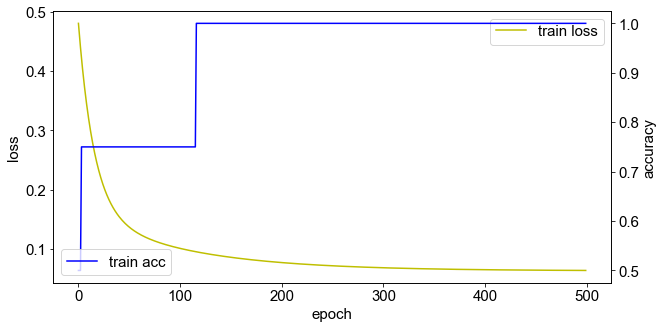

In [17]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.plot(hist.history['loss'], 'y', label = 'train loss')
# ax1.plot(hist.history['val_loss'], 'r', label = 'val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(bbox_to_anchor = (1, 1))

ax2.plot(hist.history['acc'], 'b', label = 'train acc')
# ax2.plot(hist.history['val_acc'], 'g', label = 'val acc')
ax2.set_ylabel('accuracy')
ax2.legend(loc = 'lower left')

plt.show()
